## Final Project Submission

Please fill out:
* Student name: NANGI MULETI MUGIRA 
* Student pace: self paced / part time / **full time**
* Scheduled project review date/time: 9th July 2023
* Instructor name: 
* Blog post URL:


## Business understanding

The real estate industry is a crucial sector that plays a significant role in the economy. The success of a real estate transaction depends on several factors, including the location, the size of the property, the condition of the property, the amenities, and the current market conditions. The housing market is subject to various external factors such as interest rates, economic conditions, and government policies that can impact the demand and supply of properties.




## Business Problem

Some home owners are eager to sell their houses, and I have been approached by a real estate company about how to  accurately appraise homes in King county so that they can give their customers accurate recommendations when it comes to buying and selling homes. 

By using the dataset provided, I am able to build models that can actually predict sale price of houses. Real estate agents can better advise their clients on pricing strategies, investors can identify potentially undervalued properties, and homeowners can better estimate the value of their own properties. This can ultimately lead to more efficient and profitable real estate transactions in Kings County.


In [1]:
# Importing the relevant modules

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder 
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_goldfeldquandt



In [2]:
# Loading the dataset

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [3]:
# Viewing information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Cleaning

### Missing data

In [4]:
# This  function checks for missing values and removes them and shows a dataframe for their percentages

def missing_data(data):
    
    
#     finding sum of all the missing data in the df.
    miss = data.isnull().sum().sort_values(ascending=False)
    
#     Converting it into percentage. 
    miss_percentage = miss / len(data)
    
#     Creating a dataframe to show the missing data. 
    df_missing = pd.DataFrame({'Missing values number': miss, 'Percentage missing values': miss_percentage})
    
#     drop missing values
    df_missing.drop(df_missing[df_missing['Percentage missing values'] == 0].index, inplace=True)
    
    return df_missing

missing = missing_data(df)
missing

,Missing values number,Percentage missing values
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


In [5]:
# Function to  replace our null data.

def fill_missing(data, columns):
    missing_ = missing_data(data)
    for col in columns:
#         Check if there is missing data
        if col in missing_.index:
#         Replacing the missing data with the mode
            data[col] = data[col].fillna(data[col].mode()[0])
            
    return data

fill_missing(df, ['yr_renovated', 'waterfront', 'view'])


df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Function to check for duplicates.

def duplicates(data):
    
    duplicates = data.duplicated().sum()
    
    return duplicates

df_dup = duplicates(df)
df_dup

0

In [7]:
# Replacing the question mark seen in the data set and converting the datatype to float

df['sqft_basement'] = df['sqft_basement'].replace('?', 0)

In [8]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Outliers

In [10]:
# Selecting only columns with the integer dtypes.

cols = ['price', 'bathrooms', 'floors', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']


In [11]:
# Function to check for outliers in the columns.

def outlier_box_plot(data, column_name):
    
    sns.boxplot(x=data[column_name])


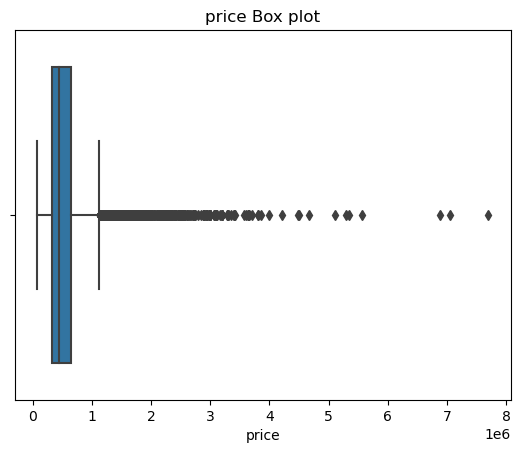

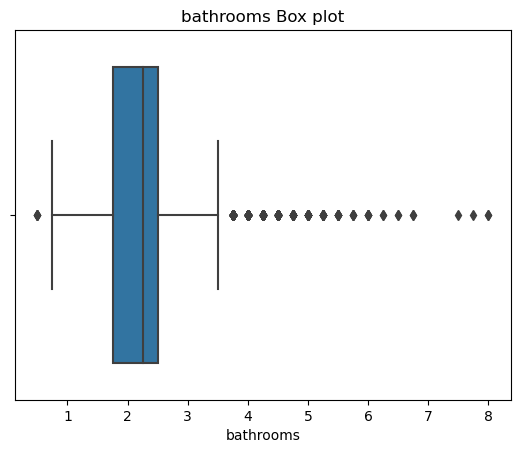

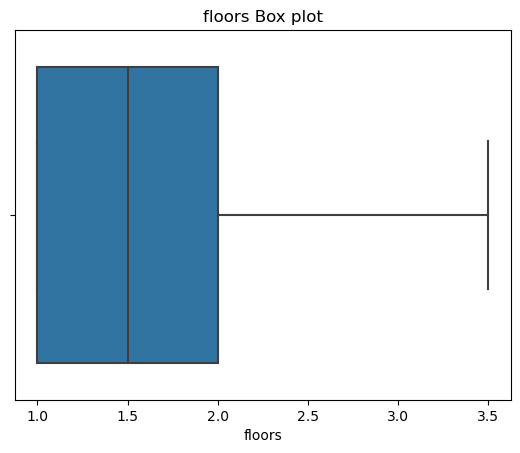

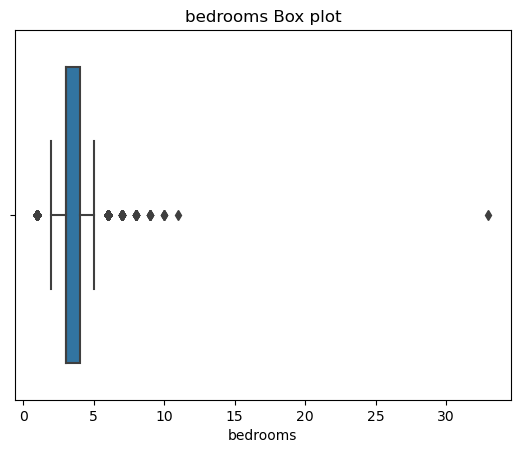

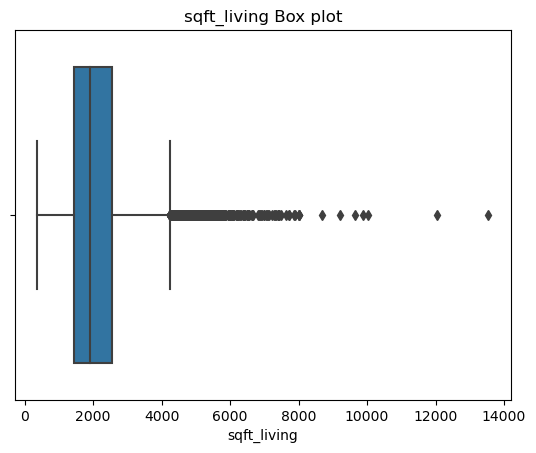

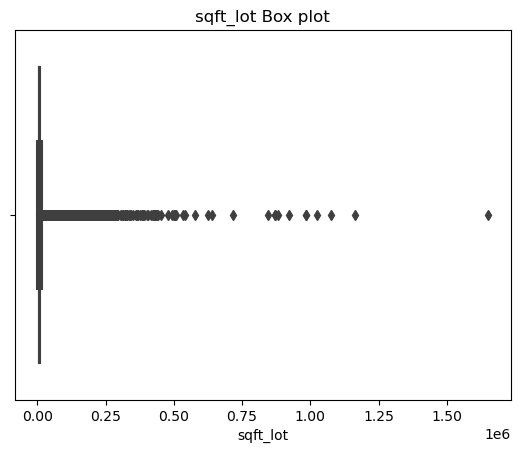

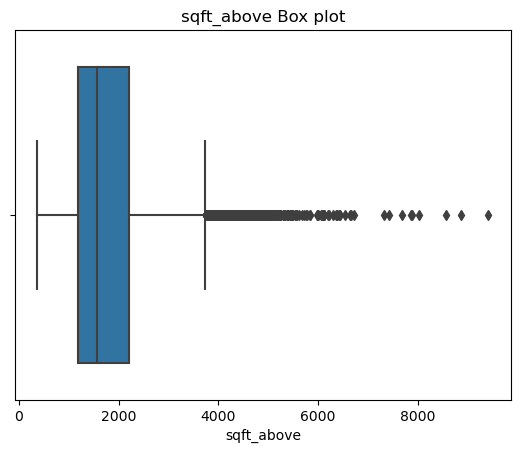

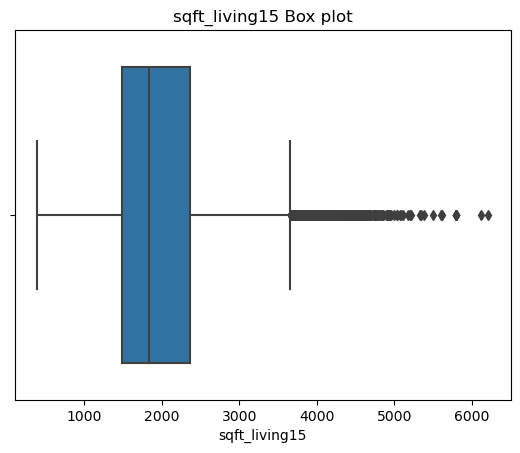

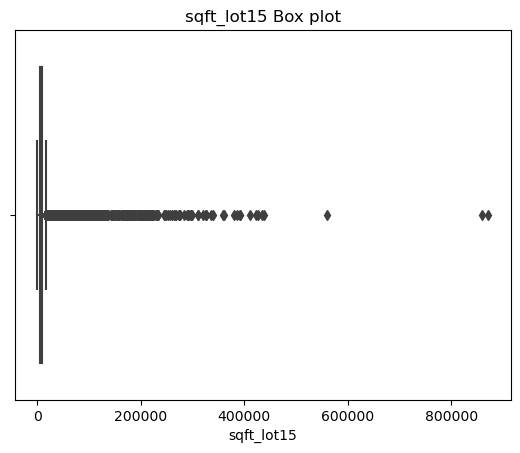

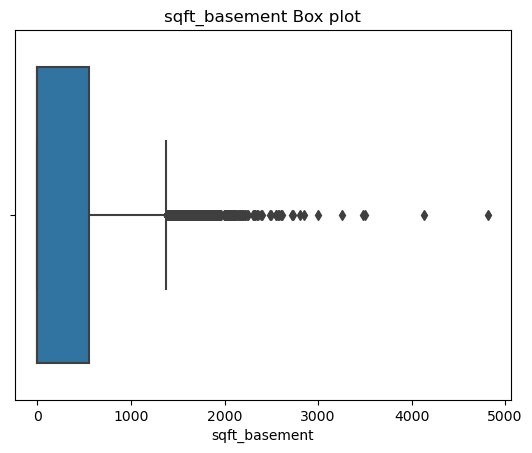

In [12]:
# Checking for outliers in the columns and plotting the box plot.

for column in cols:
    
    outlier_box_plot(df, column)
    plt.title(f'{column} Box plot')
    plt.show()

In [13]:
# Function to remove the outliers.

def remove_outliers(data, columns, threshold=3):
    
    
    for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data = data[z_scores <= threshold]
        
    return data

Since `id`, `zipcode` and `yr_built` are numeric categotical columns, we do not need to find outliers from them. Hence, we need to remove them from our selection of removing outliers.

In [14]:
# Removing outliers.

select_columns = ['price', 'bathrooms', 'floors', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

without_outliers_df = remove_outliers(df, select_columns)

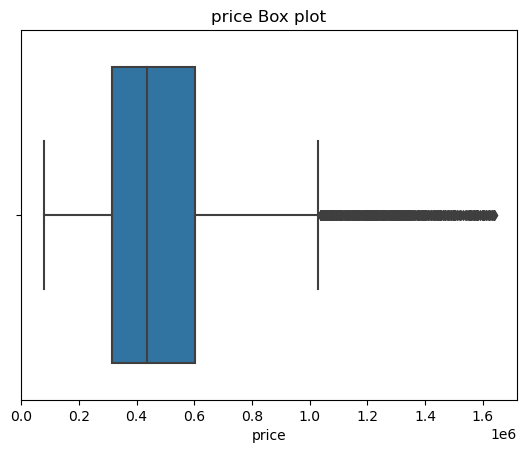

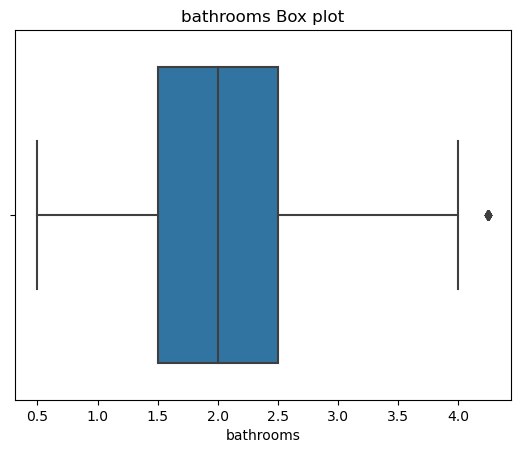

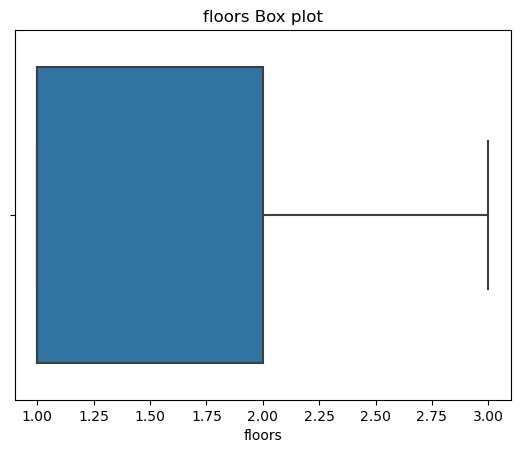

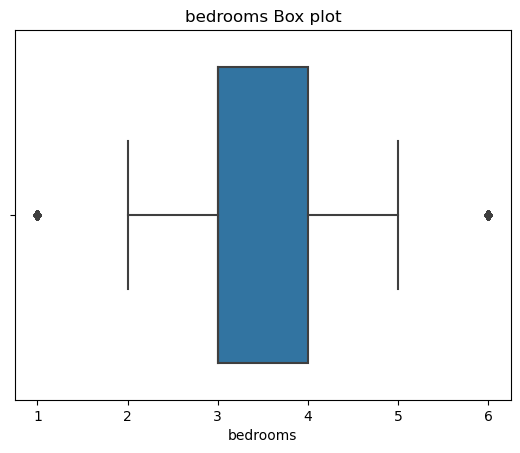

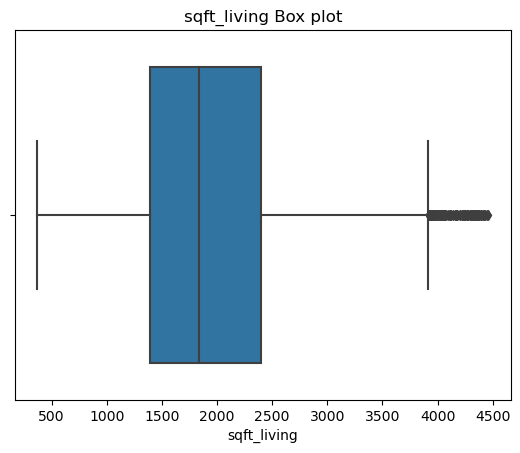

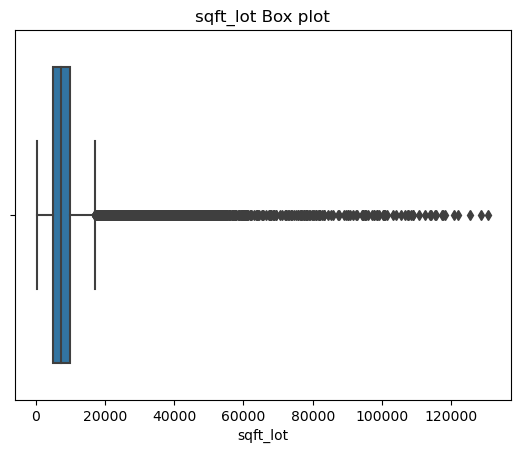

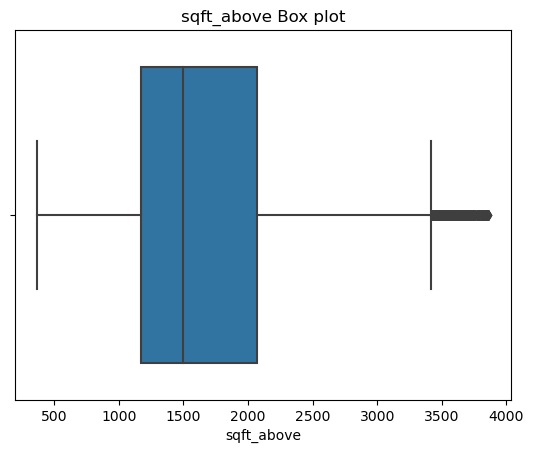

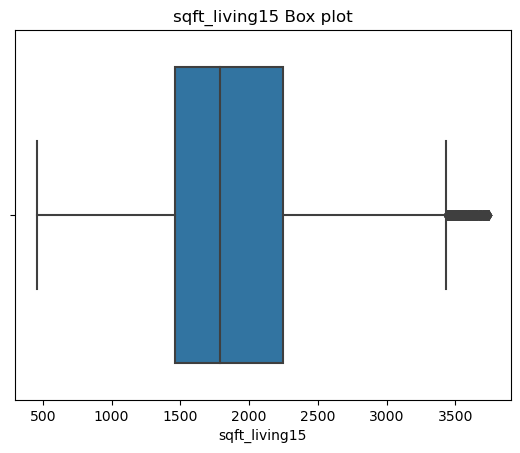

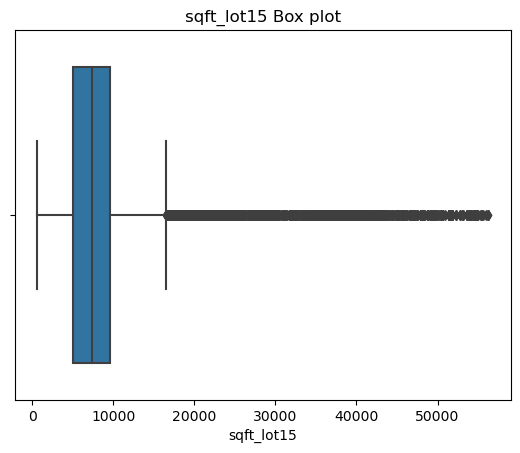

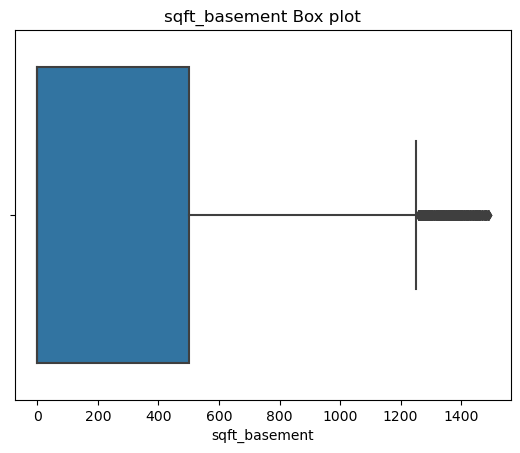

In [15]:
# Checking for outliers in the columns and plotting the box plot.

for col in select_columns:
    
    outlier_box_plot(without_outliers_df, col)
    plt.title(f'{col} Box plot')
    plt.show()

## Data preparation

### Adding `seasons` to the dataset using the `date` column

This is to better analyze which season had the most sales. 

In [16]:
# Coverting the column date to a date time object.

df['date'] = pd.to_datetime(df['date'])

# Creating a dictionary to represent each individual season
seasons = {1 : 'Winter',
          2 : 'Winter',
          3 : 'Spring',
          4 : 'Spring',
          5 : 'Spring',
          6 : 'Summer',
          7 : 'Summer',
          8 : 'Summer',
          9 : 'Autumn',
          10 : 'Autumn',
          11 : 'Autumn',
          12 : 'Winter'}
df['season'] = df['date'].dt.month.map(seasons)

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Autumn
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Winter


### Adding `age` to the dataset using `date` and `yr_built`

In [17]:
df['age'] = df['date'].dt.year - df['yr_built']
df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Autumn,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Winter,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter,49


### Categorical columns

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'season', 'age'],
      dtype='object')

First we'll need to drop the columns we are not going to use. The remaining columns are mainly going to be used as our predictor variables for the price variable. 

Columns we'll drop are `id`, `date`, `yr_built`,  `zipcode`, `lat`, `long`. Also `sqft_living15`, `sqft_lot15` as they are not relevant in our dataset. 

In [19]:
new_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'season', 'age']]

In [20]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,season,age
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,0.0,Autumn,59
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1991.0,Winter,63
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,0.0,Winter,82
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,0.0,Winter,49
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,0.0,Winter,28


#### Ordinal categorical variables

In [21]:
new_df['view'].value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [22]:
new_df['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

In [23]:
new_df['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

#### Nominal categorical variables

In [24]:
new_df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

In [25]:
new_df['season'].value_counts()

season
Spring    6518
Summer    6328
Autumn    5056
Winter    3695
Name: count, dtype: int64

## Collinearity

Building a correlation matrix, but first we will drop the all the categorical columns.

In [26]:
# Columns that have only integers and floats.

corr_df = new_df[['price', 'bathrooms', 'floors', 'yr_renovated', 'bedrooms', 'sqft_living', 'sqft_basement','sqft_lot', 'sqft_above', 'age' ]]

corr_df.head()

,price,bathrooms,floors,yr_renovated,bedrooms,sqft_living,sqft_basement,sqft_lot,sqft_above,age
0,221900.0,1.00,1.0,0.0,3,1180,0.0,5650,1180,59
1,538000.0,2.25,2.0,1991.0,3,2570,400.0,7242,2170,63
2,180000.0,1.00,1.0,0.0,2,770,0.0,10000,770,82
3,604000.0,3.00,1.0,0.0,4,1960,910.0,5000,1050,49
4,510000.0,2.00,1.0,0.0,3,1680,0.0,8080,1680,28


In [27]:
# Correlation matrix

corr_df.corr()

,price,bathrooms,floors,yr_renovated,bedrooms,sqft_living,sqft_basement,sqft_lot,sqft_above,age
price,1.000000,0.525906,0.256804,0.117855,0.308787,0.701917,0.321108,0.089876,0.605368,-0.053890
bathrooms,0.525906,1.000000,0.502582,0.047177,0.514508,0.755758,0.278485,0.088373,0.686668,-0.507561
floors,0.256804,0.502582,1.000000,0.003793,0.177944,0.353953,-0.241866,-0.004814,0.523989,-0.489514
yr_renovated,0.117855,0.047177,0.003793,1.000000,0.017900,0.051060,0.065008,0.004979,0.020645,0.202227
bedrooms,0.308787,0.514508,0.177944,0.017900,1.000000,0.578212,0.297229,0.032471,0.479386,-0.155817
sqft_living,0.701917,0.755758,0.353953,0.051060,0.578212,1.000000,0.428660,0.173453,0.876448,-0.318592
sqft_basement,0.321108,0.278485,-0.241866,0.065008,0.297229,0.428660,1.000000,0.015031,-0.051175,0.129837
sqft_lot,0.089876,0.088373,-0.004814,0.004979,0.032471,0.173453,0.015031,1.000000,0.184139,-0.052853
sqft_above,0.605368,0.686668,0.523989,0.020645,0.479386,0.876448,-0.051175,0.184139,1.000000,-0.424386
age,-0.053890,-0.507561,-0.489514,0.202227,-0.155817,-0.318592,0.129837,-0.052853,-0.424386,1.000000


Checking if any absolute correlation value is greater than 0.75

In [28]:
abs(corr_df.corr()) > 0.75

,price,bathrooms,floors,yr_renovated,bedrooms,sqft_living,sqft_basement,sqft_lot,sqft_above,age
price,True,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,True,False,False,False,False
floors,False,False,True,False,False,False,False,False,False,False
yr_renovated,False,False,False,True,False,False,False,False,False,False
bedrooms,False,False,False,False,True,False,False,False,False,False
sqft_living,False,True,False,False,False,True,False,False,True,False
sqft_basement,False,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,False,False,True,False,False
sqft_above,False,False,False,False,False,True,False,False,True,False
age,False,False,False,False,False,False,False,False,False,True


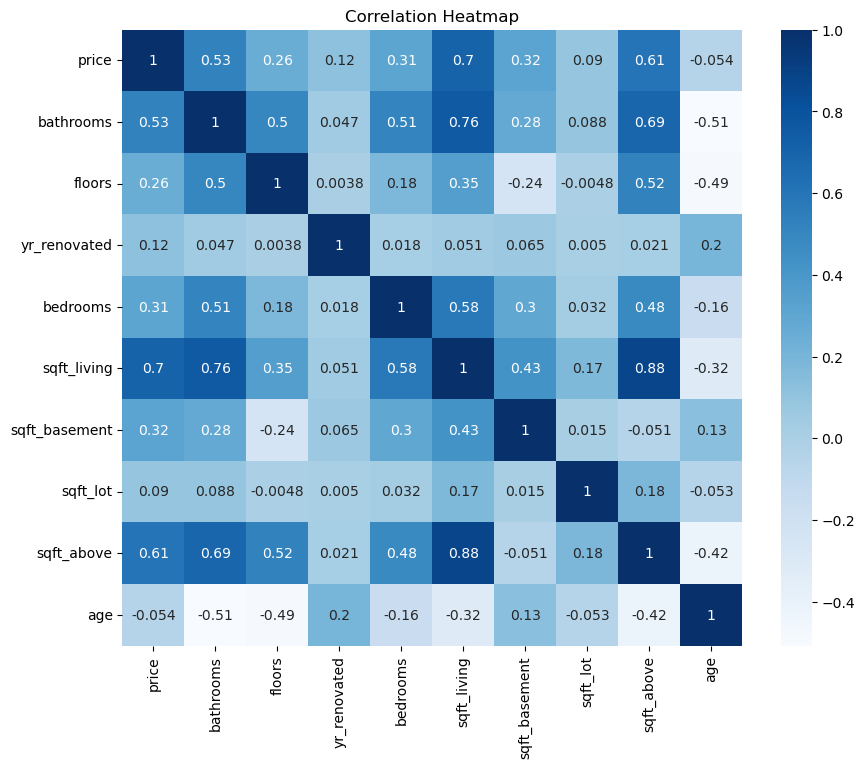

In [29]:
# A correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

It seems like the variables `sqft_living`, `bathrooms` and `sqft_above` are all pretty highly correlated among each other. 

Now, including `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [30]:
 # Finding the absolute correlation values and arranging them in descending order

df = corr_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# creating pairs for the correlation pairs

df['pairs'] = list(zip(df.level_0, df.level_1))

# Setting the pairs column as the index column.

df.set_index(['pairs'], inplace=True)

# dropping the level columns

df.drop(columns=['level_0', 'level_1'], inplace=True)

# Renaming the correlation column as cc rather than 0

df.columns = ['cc']

# dropping the duplicates

df.drop_duplicates(inplace=True)

In [31]:
df[(df.cc>0.75) & (df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(bathrooms, sqft_living)",0.755758


In [32]:
corr_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
bathrooms        0.525906
sqft_basement    0.321108
bedrooms         0.308787
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
age             -0.053890
Name: price, dtype: float64

Removing the `sqft_above` column is the most sensible option as it's the total area of the whole floor excluding the basement.

In [33]:
new_df.drop(columns=['sqft_above'], inplace=True)

## Modelling

### Baseline model

Using the highly correlated column as our independent variable. 

In [34]:
# our X and y variables for our model
X_baseline = new_df[['sqft_living']]
y = new_df['price']

# creating our model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))

# fitting our model.
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:31   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Interpretation

This model suggest that the square footage of the `sqft_living` has a significant impact on the price of the property. The model is statistically significant as it has a pvalue of less than 0.05 and using the R-squared it explains 49.3% variation of the price. 

* The coefficient for the *const* variable (intercept) is -4.399e+04, indicating the expected value of price when `sqft_living` is zero. 
* The coefficient for `sqft_living` is 280.8630, suggesting that for each unit increase in `sqft_living`, the predicted price increases by 280.8630.

Using `linear_rainbow` to check if our model follows the linearity assumption. 

`linear_rainbow` is a function that takes an OLS results object and returns a test statistic and a p-value.


In [35]:
linear_rainbow(baseline_results)

(1.0880045442869077, 5.894761434174282e-06)

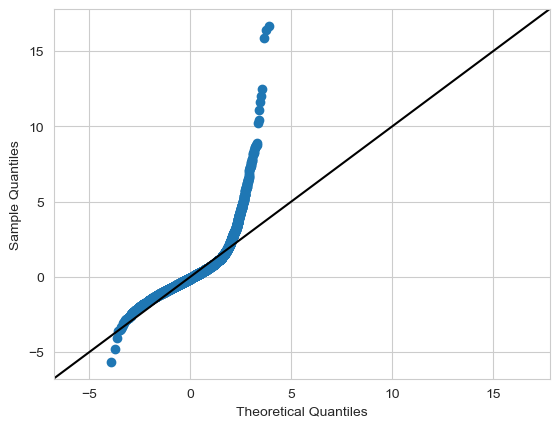

In [36]:
# testing for normality using a qq plot. 

sns.set_style('whitegrid')
fig, ax = plt.subplots()
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

scatter = ax.lines[0]
line = ax.lines[1]
# scatter.set_markeredgecolor("blue")
# scatter.set_markerfacecolor("blue")
line.set_color("black")
fig.suptitle("");

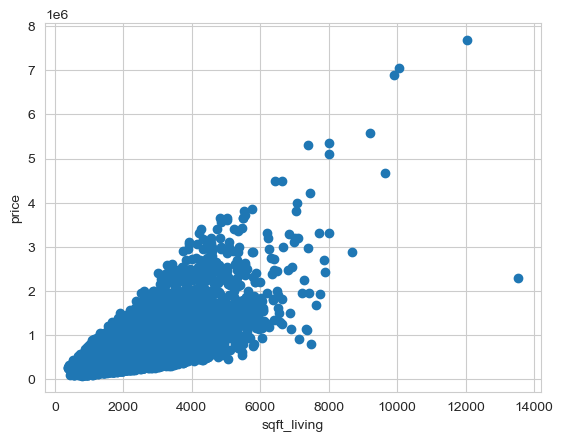

In [37]:
# Relationship between the price and the sqft of the living. 

plt.scatter(x=X_baseline, y=y)
plt.xlabel('sqft_living')
plt.ylabel('price');

### Multiple linear regression

Using continous variables as independent variables for our first multiple linear regression model. 

In [38]:
y = new_df['price']
X = new_df[['bathrooms', 'floors', 'yr_renovated', 'bedrooms', 'sqft_living', 'sqft_basement', 'sqft_lot', 'age']]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3394.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:35   Log-Likelihood:            -2.9860e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21588   BIC:                         5.973e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.182e+05   9832.122    -22.193

The F-statistic is 3394, suggesting that the overall model is highly significant. The p-value associated with the F-statistic is 0.00, indicating that the relationship between the independent variables and the dependent variable is statistically significant.

* The R-squared value is 0.557; an increase from the baseline model, indicating that approximately 55.7% of the variance in the dependent variable `price` can be explained by the independent variables included in the model.
* One-unit increase in `bathrooms` is associated with a price increase of approximately 66,890 which is the highest. Similarly, a one-unit increase in `floors` is associated with a price increase of approximately 49,710. `yr_renovated` has a coefficient of 22.6456, suggesting that each year of renovation is associated with a price increase of 22.6456 which is the lowest. 


In [39]:
# testing for linearity

linear_rainbow(results)

(1.1026979212453456, 1.9155033614995566e-07)

`linear_rainbow` is a function that takes an OLS results object and returns a test statistic and a p-value.

The model has a **p-value of about 0.0000001**. This is much lower than the standard alpha of 0.05, so we reject the null hypothesis and **do not consider the relationship to be linear**

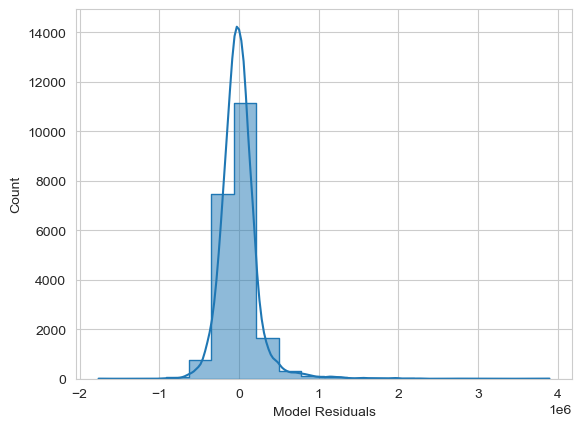

In [40]:
# Testing for normality using a histogram

fig, ax = plt.subplots()
sns.histplot(results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

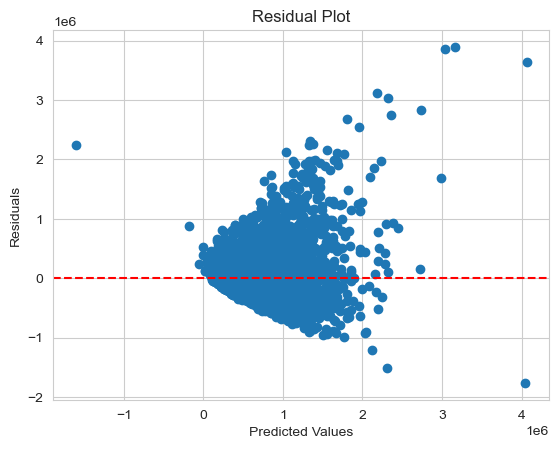

In [41]:
# Testing for homoscedasticity using a residual Plot

residuals = results.resid
predicted = results.predict()

# residuals = actual_values - predicted_values

plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

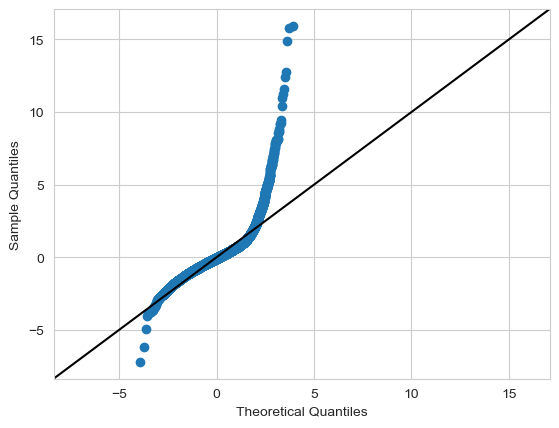

In [42]:
# testing for normality using a qq plot. 

fig, ax = plt.subplots()
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

scatter = ax.lines[0]
line = ax.lines[1]
# scatter.set_markeredgecolor("blue")
# scatter.set_markerfacecolor("blue")
line.set_color("black")
fig.suptitle("");

From the Q-Q plot above, it can be seen that the graph doesn't follow the normality assumption. Hence performing the log of the X and the y variables may be able to cure this issue. 

In [43]:
log = np.log(new_df[['price', 'bathrooms', 'floors', 'bedrooms', 'sqft_living',  'sqft_basement', 'sqft_lot', 'age']])
log

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,price,bathrooms,floors,bedrooms,sqft_living,sqft_basement,sqft_lot,age
0,12.309982,0.000000,0.000000,1.098612,7.073270,-inf,8.639411,4.077537
1,13.195614,0.810930,0.693147,1.098612,7.851661,5.991465,8.887653,4.143135
2,12.100712,0.000000,0.000000,0.693147,6.646391,-inf,9.210340,4.406719
3,13.311329,1.098612,0.000000,1.386294,7.580700,6.813445,8.517193,3.891820
4,13.142166,0.693147,0.000000,1.098612,7.426549,-inf,8.997147,3.332205
...,...,...,...,...,...,...,...,...
21592,12.793859,0.916291,1.098612,1.098612,7.333023,-inf,7.030857,1.609438
21593,12.899220,0.916291,0.693147,1.386294,7.745003,-inf,8.667852,0.000000
21594,12.904459,-0.287682,0.693147,0.693147,6.927558,-inf,7.207860,1.609438
21595,12.899220,0.916291,0.693147,1.098612,7.377759,-inf,7.778211,2.397895


In [44]:
# Dropping the null and inf values as they cannot be used in our model.

log.dropna(inplace=True)
log.replace([np.inf, -np.inf], np.nan, inplace=True)
log.dropna(inplace=True)

In [45]:
# Building a multiple linear regression model using the log og the variables. 

y_log = log['price']
X_log = log.drop(columns='price')
log_model = sm.OLS(y_log, sm.add_constant(X_log))
log_results = log_model.fit()

print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1306.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:40   Log-Likelihood:                -3230.1
No. Observations:                8197   AIC:                             6476.
Df Residuals:                    8189   BIC:                             6532.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2914      0.117     45.231

The coefficients represent the estimated effect of each independent variable on the dependent variable (price) after taking the logarithm of each variable. 


* `constant` (const): The intercept of the regression line when all independent variables are zero. In this case, it is 5.2914. Since the dependent variable (price) has been transformed logarithmically, this coefficient represents the average log(price) when all other variables are zero.

* `bathrooms`: A one-unit increase in the number of bathrooms is associated with an estimated increase of 0.1439 in the log(price), holding all other variables constant.

* `floors`: A one-unit increase in the number of floors is associated with an estimated increase of 0.1965 in the log(price), holding all other variables constant.

* `bedrooms`: A one-unit increase in the number of bedrooms is associated with an estimated decrease of 0.2910 in the log(price), holding all other variables constant.

* `sqft_living`: A one-unit increase in the square footage of living space is associated with an estimated increase of 1.2240 in the log(price), holding all other variables constant.

* `sqft_basement`: A one-unit increase in the square footage of the basement is associated with an estimated decrease of 0.1452 in the log(price), holding all other variables constant.

* `sqft_lot`: A one-unit increase in the square footage of the lot is associated with an estimated decrease of 0.0918 in the log(price), holding all other variables constant.

* `age`: A one-unit increase in the age of the house is associated with an estimated increase of 0.1261 in the log(price), holding all other variables constant.

These coefficients represent the percentage change in the dependent variable (price) associated with a 1% change in the corresponding independent variable, due to the logarithmic transformation.

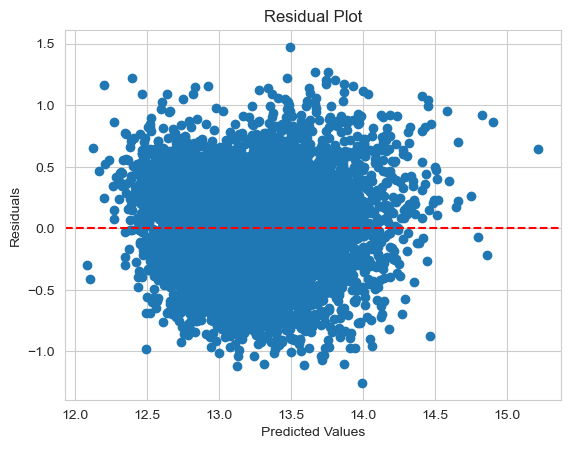

In [46]:
# Residual Plot

residuals = log_results.resid
predicted = log_results.predict()

# residuals = actual_values - predicted_values

plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

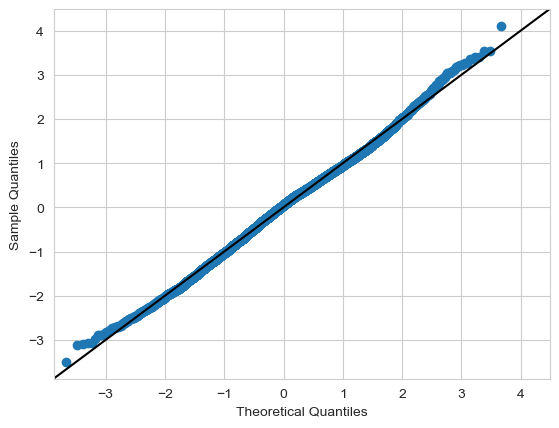

In [47]:
# testing for normality using a qq plot. 

fig, ax = plt.subplots()
sm.graphics.qqplot(log_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

scatter = ax.lines[0]
line = ax.lines[1]
# scatter.set_markeredgecolor("blue")
# scatter.set_markerfacecolor("blue")
line.set_color("black")
fig.suptitle("");

After finding the log of the all the varibales, we can see from the Q-Q plot above that the model now follows normality assumption. 

### One Hot Encoding 

In [48]:
copy_df = new_df.copy()

ohe_df = copy_df[['waterfront', 'view', 'condition', 'grade', 'season']]

The function below uses sklearn to OneHotEncode the categorical columns and embeds them to our main data set.

In [49]:
def one_hot_encode_columns(dataframe, columns_to_encode):
# Copy the dataframe to avoid modifying the original data
    encoded_df = dataframe.copy()

# Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Iterate over the columns to encode
    for column in columns_to_encode:
    # Extract the column values and reshape into a 2D array
        column_values = encoded_df[column].values.reshape(-1, 1)

    # Perform one-hot encoding on the column
        encoded_values = encoder.fit_transform(column_values)

    # Create new column names for the encoded values
        new_columns = [f"{column}_{i}" for i in range(encoded_values.shape[1])]

    # Create a new dataframe from the encoded values and column names
        encoded_df = pd.concat([encoded_df, pd.DataFrame(encoded_values, columns=new_columns)], axis=1)

    # Drop the original column from the dataframe
        encoded_df.drop(column, axis=1, inplace=True)

    return encoded_df


####  OneHotEncoding for `waterfront` categorical variable

In [50]:
wf_df = copy_df[['waterfront']]

In [51]:
wf_ohe_df = one_hot_encode_columns(copy_df, wf_df)


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
# Model including all waterfront categorical column

y = wf_ohe_df['price']
X = wf_ohe_df.drop(columns=['price','view','grade','condition','season'], axis=1)
wf_model = sm.OLS(y, sm.add_constant(X))
wf_results = wf_model.fit()

print(wf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     3391.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:44   Log-Likelihood:            -2.9787e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21587   BIC:                         5.958e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.138e+05   9230.066     12.324

####  OneHotEncoding for `seasons` categorical variable

In [53]:
ss_df = copy_df[['season']]

In [54]:
ss_ohe_df = one_hot_encode_columns(copy_df, ss_df)


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
# Model including all season categorical column

y = ss_ohe_df['price']
X = ss_ohe_df.drop(columns=['price','view','grade','condition','waterfront'], axis=1)
ss_model = sm.OLS(y, sm.add_constant(X))
ss_results = ss_model.fit()

print(ss_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2479.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:44   Log-Likelihood:            -2.9857e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21585   BIC:                         5.973e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.762e+05   7860.411    -22.411

####  OneHotEncoding for `views` categorical variable

In [56]:
vs_df = copy_df[['view']]

In [57]:
vs_ohe_df = one_hot_encode_columns(copy_df, vs_df)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
# Model including all view categorical column

y = vs_ohe_df['price']
X = vs_ohe_df.drop(columns=['price','season','grade','condition','waterfront'], axis=1)
vs_model = sm.OLS(y, sm.add_constant(X))
vs_results = vs_model.fit()

print(vs_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2612.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:44   Log-Likelihood:            -2.9770e+05
No. Observations:               21597   AIC:                         5.954e+05
Df Residuals:                   21584   BIC:                         5.955e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7296.9331   9129.327     -0.799

####  OneHotEncoding for `condition` categorical variable

In [59]:
cd_df = copy_df[['condition']]

In [60]:
cd_ohe_df = one_hot_encode_columns(copy_df, cd_df)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
# Model including all condition categorical column

y = cd_ohe_df['price']
X = cd_ohe_df.drop(columns=['price','season','grade','view','waterfront'], axis=1)
cd_model = sm.OLS(y, sm.add_constant(X))
cd_results = cd_model.fit()

print(cd_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2274.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:44   Log-Likelihood:            -2.9857e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21584   BIC:                         5.973e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.841e+05   1.17e+04    -15.713

####  OneHotEncoding for `grade` categorical variable

In [62]:
gd_df = copy_df[['grade']]

In [63]:
gd_ohe_df = one_hot_encode_columns(copy_df, gd_df)


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
# Model including all grade categorical column

y = gd_ohe_df['price']
X = gd_ohe_df.drop(columns=['price','season','view','condition','waterfront'], axis=1)
gd_model = sm.OLS(y, sm.add_constant(X))
gd_results = gd_model.fit()

print(gd_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2208.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:44   Log-Likelihood:            -2.9611e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21578   BIC:                         5.924e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.281e+05   2.16e+04     15.184

#### OneHotEncoding for all categorical columns 

In [65]:
#  OneHotEncoding for all categorical columns

all_ohe_df = one_hot_encode_columns(copy_df, ohe_df)
all_ohe_df

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sp

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_renovated,age,waterfront_0,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,season_0,season_1,season_2,season_3
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,59,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,400.0,1991.0,63,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,82,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,604000.0,4,3.00,1960,5000,1.0,910.0,0.0,49,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,28,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,5,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,11,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [66]:
# Model including all categorical columns

y = all_ohe_df['price']
X = all_ohe_df.drop(columns='price')
ohe_model = sm.OLS(y, sm.add_constant(X))
ohe_results = ohe_model.fit()

print(ohe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1551.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:45   Log-Likelihood:            -2.9498e+05
No. Observations:               21597   AIC:                         5.900e+05
Df Residuals:                   21566   BIC:                         5.903e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.222e+05   1.15e+04     27.941

This OLS regression model aims to predict the housing prices (dependent variable) based on several independent variables. Here's an interpretation of the model:

Overall, the model has a good fit with an R-squared value of 0.683, indicating that approximately 68.3% of the variability in housing prices can be explained by the independent variables included in the model.

The coefficients of the independent variables provide insights into their relationships with the housing prices:

* `bedrooms`: For each additional bedroom, the model predicts a decrease in housing prices by approximately $24,390, holding all other variables constant.

* `bathrooms`: For each additional bathroom, the model predicts an increase in housing prices by approximately $47,140, holding all other variables constant.

* `sqft_living`: For each additional square foot of living space, the model predicts an increase in housing prices by approximately $128, holding all other variables constant.

* `sqft_lot`: For each additional square foot of lot size, the model predicts a decrease in housing prices by approximately $0.25, holding all other variables constant.

* `floors`: Houses with an additional floor have an estimated increase in housing prices by approximately $41,570, holding all other variables constant.

* `sqft_basement`: For each additional square foot of basement space, the model predicts an increase in housing prices by approximately $27, holding all other variables constant.

* `yr_renovated`: For each additional year of renovation, the model predicts an increase in housing prices by approximately $21.64, holding all other variables constant.

* `age`: For each additional year of age, the model predicts an increase in housing prices by approximately $3,148, holding all other variables constant.

The one-hot encoded variables, such as `waterfront`, `view`, `condition`, `grade`, and `season`, indicate the presence or absence of certain features or categories. The coefficients associated with these variables represent the estimated differences in housing prices compared to their respective reference categories.

For example, `waterfront_0` serves as the reference category for the `waterfront` variable. The coefficient for `waterfront_1` suggests that houses with a waterfront have an estimated increase in housing prices by approximately $424,000 compared to houses without a waterfront, holding all other variables constant.

Similarly, coefficients for other one-hot encoded variables, such as `view_1`, `condition_2`, `grade_3`, and `season_1`, indicate the estimated differences in housing prices compared to their respective reference categories.

It's important to note that the significance of each coefficient is determined by the p-value. A p-value less than the chosen significance level (e.g., 0.05) indicates that the coefficient is statistically significant.

Overall, this regression model provides insights into the relationships between various independent variables and housing prices, allowing for the estimation of housing prices based on these factors.

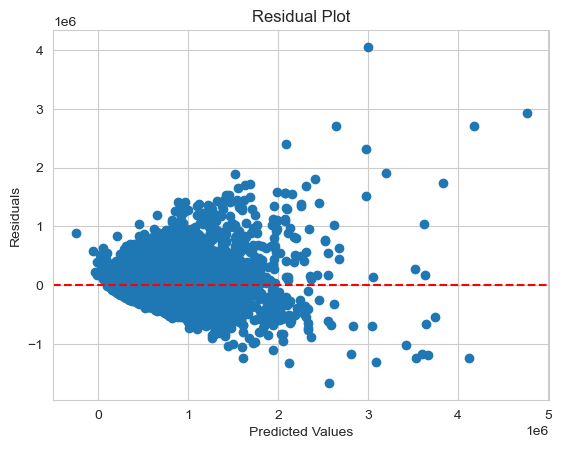

In [67]:
# Testing for homoscedasticity using a residual Plot

residuals = ohe_results.resid
predicted = ohe_results.predict()

# residuals = actual_values - predicted_values

plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [68]:
# testing for linearity

linear_rainbow(ohe_results)

(1.0964591899720915, 8.755986233996701e-07)

`linear_rainbow` is a function that takes an OLS results object and returns a test statistic and a p-value.

The model has a **p-value of about 0.0000008**. This is much lower than the standard alpha of 0.05, so we reject the null hypothesis and **do not consider the relationship to be linear**

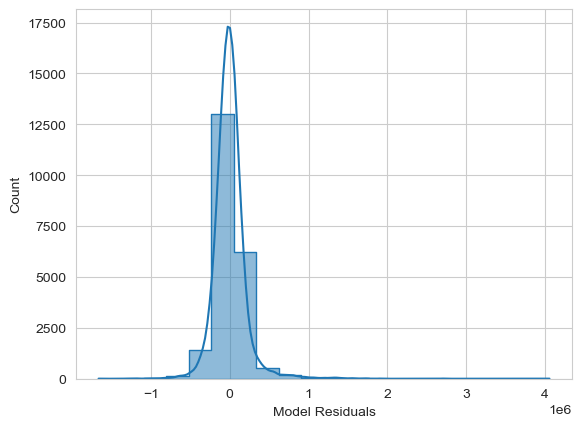

In [69]:
# Testing for normality using a histogram

fig, ax = plt.subplots()
sns.histplot(ohe_results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

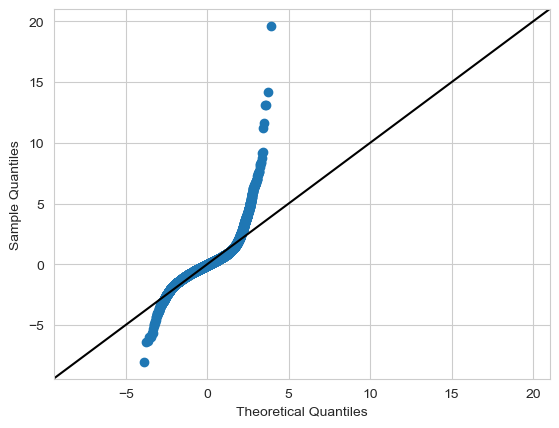

In [70]:
# testing for normality using a qq plot. 

fig, ax = plt.subplots()
sm.graphics.qqplot(ohe_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

scatter = ax.lines[0]
line = ax.lines[1]
# scatter.set_markeredgecolor("blue")
# scatter.set_markerfacecolor("blue")
line.set_color("black")
fig.suptitle("");

Same as the multiple linear regression model; from the Q-Q plot above, it can be seen that the graph doesn't follow the normality assumption. Hence performing the log of the X and the y variables may be able to cure this issue. 

Since we had performed the log before, we are just going to merge with the categorical columns using the `pd.concat()` so as to OneHotEncode the whole dataset. 

In [71]:
# Merging the two datasets. 

log_df = pd.concat([log, ohe_df], axis=1)
log_df

,price,bathrooms,floors,bedrooms,sqft_living,sqft_basement,sqft_lot,age,waterfront,view,condition,grade,season
1,13.195614,0.810930,0.693147,1.098612,7.851661,5.991465,8.887653,4.143135,NO,NONE,Average,7 Average,Winter
3,13.311329,1.098612,0.000000,1.386294,7.580700,6.813445,8.517193,3.891820,NO,NONE,Very Good,7 Average,Winter
5,14.022525,1.504077,0.000000,1.386294,8.597851,7.333023,11.532042,2.564949,NO,NONE,Average,11 Excellent,Spring
8,12.343658,0.000000,0.000000,1.098612,7.484369,6.593045,8.918650,4.007333,NO,NONE,Average,7 Average,Spring
10,13.403776,0.916291,0.000000,1.098612,8.177516,7.438384,9.189729,3.912023,NO,NONE,Average,8 Good,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,Average,8 Good,Spring
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,Average,8 Good,Winter
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,Average,7 Average,Summer
21595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,Average,8 Good,Winter


In [72]:
# OneHotEncoding the merged dataset using the function created earlier.

log_ohe_df = one_hot_encode_columns(log_df, ohe_df)
log_ohe_df

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sp

,price,bathrooms,floors,bedrooms,sqft_living,sqft_basement,sqft_lot,age,waterfront_0,waterfront_1,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,season_0,season_1,season_2,season_3
1,13.195614,0.810930,0.693147,1.098612,7.851661,5.991465,8.887653,4.143135,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,13.311329,1.098612,0.000000,1.386294,7.580700,6.813445,8.517193,3.891820,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,14.022525,1.504077,0.000000,1.386294,8.597851,7.333023,11.532042,2.564949,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,12.343658,0.000000,0.000000,1.098612,7.484369,6.593045,8.918650,4.007333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,13.403776,0.916291,0.000000,1.098612,8.177516,7.438384,9.189729,3.912023,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
# Dropping the null and inf values as they cannot be used in our model.

log_ohe_df.dropna(inplace=True)
log_ohe_df.replace([np.inf, -np.inf], np.nan, inplace=True)
log_ohe_df.dropna(inplace=True)

In [74]:
# Model including all categorical columns

y = log_ohe_df['price']
X = log_ohe_df.drop(columns='price')
ohe_model = sm.OLS(y, sm.add_constant(X))
log_ohe_results = ohe_model.fit()

print(log_ohe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     327.2
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:01:52   Log-Likelihood:                -3220.5
No. Observations:                8197   AIC:                             6499.
Df Residuals:                    8168   BIC:                             6702.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3319      0.055     42.213

In both models, the coefficients, their standard errors, t-values, and p-values give insight into the relationship between each independent variable and the dependent variable (price). The p-values indicate the statistical significance of each variable. For example, a p-value of 0.000 means the variable is highly likely to have a significant impact on the price.

It's worth noting that the second model, using the logarithm of the independent variables, has a lower R-squared value compared to the first model. Whereby, the R-squared value of 0.529 indicates that 52.9% of the variation in the dependent variable (price) can be explained by the independent variables in the model. This means that the model captures a moderate amount of the variability in house prices based on the selected features. The adjusted R-squared value of 0.527 is similar, suggesting that the model's explanatory power is consistent even when accounting for the number of independent variables.

This suggests that the log-transformed variables may not provide as good of a fit for explaining the variation in price compared to the original variables.

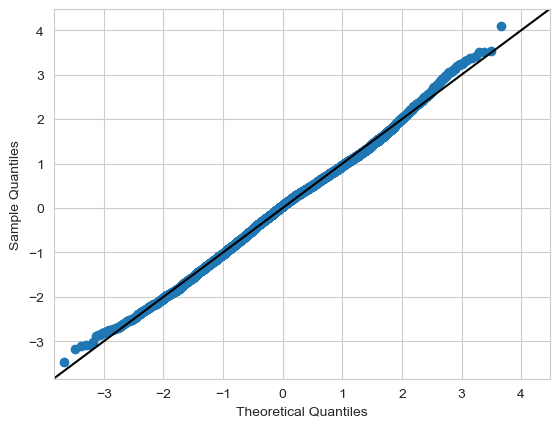

In [75]:
# testing for normality using a qq plot. 

fig, ax = plt.subplots()
sm.graphics.qqplot(log_ohe_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

scatter = ax.lines[0]
line = ax.lines[1]
# scatter.set_markeredgecolor("blue")
# scatter.set_markerfacecolor("blue")
line.set_color("black")
fig.suptitle("");

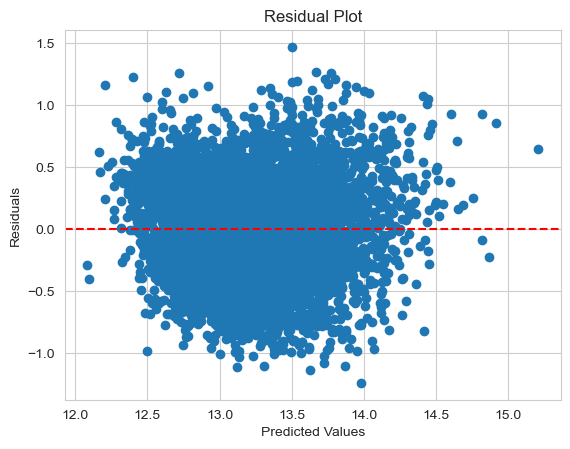

In [76]:
# Testing for homoscedasticity using a residual Plot

residuals = log_ohe_results.resid
predicted = log_ohe_results.predict()

# residuals = actual_values - predicted_values

plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Conclusions

Model 1 (using the original variables) appears to have a better fit and interpretability compared to Model 2 (using the logarithm of variables). This is due to Model 1 has a higher R-squared value of 0.683, indicating that it explains a greater proportion of the variance in the dependent variable (price) compared to Model 2.

`sqft_living` has the highest correlation with our dependent variable `price`. 

`seasons` have the major influence with our price, as houses are sold the highest in price in the spring(`season_1`) and the lowest in the winter(`season_3`).

Houses stated to be in very good condition(`condition_4`) and excellent view (`view_1`) get to have the highest price.

`bathroom` and `floors` considered a major part of the house as an addtional of each of them amounts to an average of $45,000. 

The variables that has the least influence on the price of the house are: `yr_renovated`, `sqft_lot` and  `sqft_basement`.

## Recommendations

* Put up their houses for sale in peak season spring.

* Ensure that the houses are in good condition before putting it into the market for sale.

* Revonate their house since this increases the value of the house.

* Increase square footage of living space.
